**Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
voice_data = pd.read_csv("voice.csv")
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
voice_data['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [14]:
X = voice_data.iloc[:, : -1].values
Y = voice_data.iloc[:, -1].values

In [15]:
Y

array(['male', 'male', 'male', ..., 'female', 'female', 'female'],
      dtype=object)

In [16]:
X

array([[0.05978098, 0.06424127, 0.03202691, ..., 0.0078125 , 0.        ,
        0.        ],
       [0.06600874, 0.06731003, 0.04022873, ..., 0.0546875 , 0.046875  ,
        0.05263158],
       [0.0773155 , 0.08382942, 0.03671846, ..., 0.015625  , 0.0078125 ,
        0.04651163],
       ...,
       [0.14205626, 0.09579843, 0.18373124, ..., 2.9375    , 2.9296875 ,
        0.19475862],
       [0.14365874, 0.09062826, 0.18497617, ..., 3.59375   , 3.5859375 ,
        0.31100218],
       [0.16550895, 0.09288354, 0.18304392, ..., 0.5546875 , 0.546875  ,
        0.35      ]])

In [17]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(Y))

In [18]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
X_train.shape

(2534, 20)

In [21]:
X_test.shape

(634, 20)

In [22]:
y_train.shape

(2534, 2)

In [23]:
y_test.shape

(634, 2)

**Model Design**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [26]:
num_classes = y.shape[1]

In [30]:
model = Sequential()

# First Layer
model.add(Dense(300, activation="relu", input_shape=(20,) ))
model.add(Dropout(0.2))

# Second Layer
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.2))

# Third Layer
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(num_classes, activation="softmax"))

# Compiling
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 300)               6300      
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               60200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

num_epochs = 150
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/content/gender_coice.hdf5',
                               verbose=1,save_best_only=True)

In [33]:
history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

Epoch 1/150
80/80 [==============================] - 1s 6ms/step - loss: 1.1693 - accuracy: 0.5138 - val_loss: 1.0300 - val_accuracy: 0.5442

Epoch 00001: val_loss improved from inf to 1.02998, saving model to /content/gender_coice.hdf5
Epoch 2/150
80/80 [==============================] - 0s 3ms/step - loss: 1.0189 - accuracy: 0.5773 - val_loss: 0.6494 - val_accuracy: 0.5584

Epoch 00002: val_loss improved from 1.02998 to 0.64938, saving model to /content/gender_coice.hdf5
Epoch 3/150
80/80 [==============================] - 0s 4ms/step - loss: 0.8077 - accuracy: 0.6330 - val_loss: 0.6080 - val_accuracy: 0.6972

Epoch 00003: val_loss improved from 0.64938 to 0.60800, saving model to /content/gender_coice.hdf5
Epoch 4/150
80/80 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.6752 - val_loss: 0.5889 - val_accuracy: 0.6909

Epoch 00004: val_loss improved from 0.60800 to 0.58892, saving model to /content/gender_coice.hdf5
Epoch 5/150
80/80 [=====================

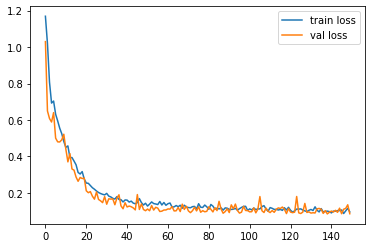

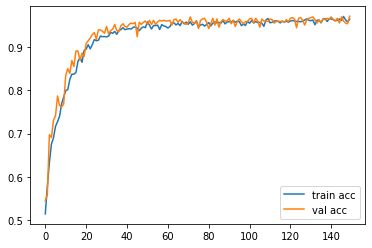

In [34]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()